# Graded Lab Assignment: Logistic Regression

Student name : Katja Bouman 

Student number : 11155787

In this assignment you will classify hand-written digits using logistic regression.

The assignment follows Andrew Ng's explanation of Logistic Regression and (re)watching his videos could be useful (Week 3)

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline. 


### Deadline Tuesday, October 10th, 23:59

Do not hand in any other files, the Notebook should contain all your answers.

The points for the assignmnet are distributed as follows:
* The implementation
    - prediction_function
    - cost_function
    - compute_gradient
    - correct stop condition
    - preventing overfitting
    - systematically choosing learning rate 
    - 
    

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
import numpy as np

In [10]:
from __future__ import division

Scikit-learn is a toolkit that has several datasets built in. You first need to install the toolkit: http://scikit-learn.org/stable/install.html

The MNIST dataset that you will be using for this assignment contains images of hand-written digits that are only 8 by 8 pixels, which means the algorithm (logistic regression) should run on every computer.

The code in the cell below shows how to work with the digits dataset and  how to visualize it. As you can see the numbers are not very clear in 8x8 pixels images, this means we cannot expect our logistic regression will have a very high classification score.

The numbers shown are: 
[[0 1 2 3 4]
 [5 6 7 8 9]]


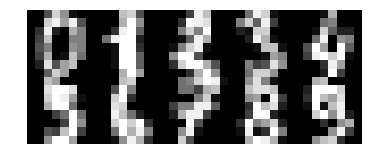

In [11]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)))

print "The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10]))

## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of logistic regression. Don't change the definitions of the functions and input parameters.

(1) Make sure that you do not overfit by keeping track of the score on the test set and implementing a correct stop condition. 
(2) Systematically pick a learning rate alpha that makes sure the algorithm learns in a smooth and stable manner (show how you do it). 
(3) Plot how your score on the test set improves over time. My best score was about 85% correct!
(4) Make sure to comment your code!

In [12]:
# Hypothesis function takes x and theta and returns the predicted x, using dot product because theta and x are both vectors
def prediction_function(x,theta):
    z = dot(theta.transpose(),x)
    return 1 / ( 1 + exp(-z))
    

In [13]:
# The cost function J, takes the predicted x and takes a y vector and it returns the associated costs.
# The y is transposed such that it has the right shape for the x value
def cost_function(x_predict,y): 
    m = size(y)
    result = (1/m) * sum(transpose(y) * log(x_predict)+transpose((1-y)) * log(1-x_predict))
    return result

In [49]:
# The gradient function takes the predicted x, the y vector and the x values and returns the gradient valeus; the new theta values.
def compute_gradient(x_predict, y, x):
    m = len(x)
    dtheta = (outer((x_predict - y),x))/m  
 
    return dtheta.T

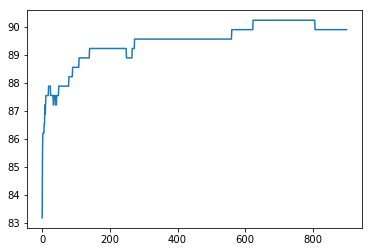

267
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 

In [56]:
#Choose a suitable learning rate
alpha = 0.001
iterations = 900   
theta = np.zeros((64,10))

#Choose a suitable stopcondition
stopcondition = 0.00005

# It is important to check that you're not overfitting by testing your prediction on a testset
# Test whether the program converts the x_test to the right target_test
x = np.reshape(digits.images[:1500],(1500,64))
x_test = np.reshape(digits.images[1500:],(297,64))

target = digits.target[:1500]
target_test = digits.target[1500:]

performance_array = []
total_cost = []

# Now we put everything together
for i in range(iterations):
    for j in range(x.shape[0]):
        # Use the hypothesis function to create an predicted x
        x_predict = prediction_function(x[j,:],theta)    
            
        # First we need a vector with only zeros, next we can set the right class equal to 1
        y = np.zeros(10)
        y[target[j]] = 1            
        
        cost = cost_function(x_predict,y)
        # Make list of the cost at each iteration, then you can see how it changes
        total_cost.append(cost)      
        
        # Gradient descent
        gradient_value = compute_gradient(x_predict, y, x[j,:])
           
        #for a in range(alpha):
        # Update theta's using the gradient descent and the learning rate
        theta -= alpha *gradient_value    
 
          
    # Now we need to keep track of how our algorithm is inproving by learning and whether it is improving it's score. 
    score = 0
    for j in range(x_test.shape[0]):
    # We use the test set as our input for x
        x_predict = prediction_function(x_test[j,:].T, theta) #theta_function
    # And then compare if the values are equal to the (correct) ones in the target set 
        if argmax(x_predict) == target_test[j]:
        # If algorithm finds the correct x, add one to your score of correct predictions
            score += 1
    # Now get your score in percentage (out of the whole test set what percentage did you guess right)
    performance = (score / x_test.shape[0])*100
    performance_array.append(performance)
    
    
# Use the number of iterations as the x array for your plot           
x_Array = range(iterations)

# Now plot the percentage of correctly guessed images against the number of iterations. 
plt.plot(x_Array, performance_array)
plt.show()

#Keep track of your final score:
print score
print x_Array
print performance_array
